In [5]:
using LinearAlgebra

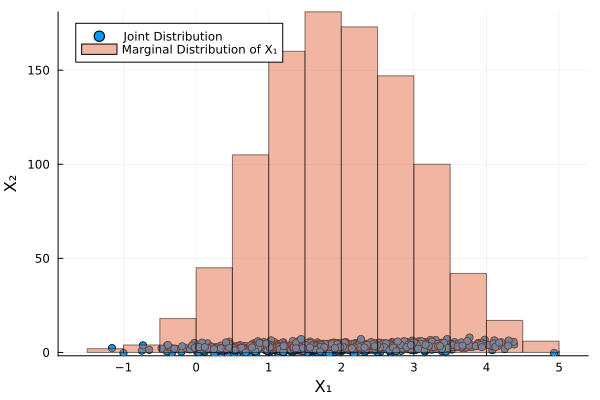

In [35]:
using Distributions
using Random

# Set a random seed for reproducibility
Random.seed!(42)

# Define the joint distribution parameters
μ = [2.0, 3.0]   # Mean vector
Σ = [1.0 0.5;    # Covariance matrix
     0.5 2.0]

# Create the joint multivariate normal distribution
joint_distribution = MvNormal(μ, Σ)

# Generate a random sample from the joint distribution
X_sample = rand(joint_distribution, 1000)

# Extract the marginal distribution of X₁
μ₁_marginal = μ[1]
σ₁²_marginal = Σ[1, 1]
marginal_distribution_X₁ = Normal(μ₁_marginal, sqrt(σ₁²_marginal))

# Generate a random sample from the marginal distribution of X₁
X₁_sample = rand(marginal_distribution_X₁, 1000)

# Plot the joint distribution and the marginal distribution of X₁
using Plots

scatter(X_sample[1, :], X_sample[2, :], label="Joint Distribution", xlabel="X₁", ylabel="X₂", legend=:topleft)
histogram!(X₁_sample, bins=:scott, label="Marginal Distribution of X₁", alpha=0.5)


In [2]:
using LinearAlgebra

# Assuming bivariate_covariance is a 2x2 matrix
bivariate_covariance = [1.0 0.8; 0.8 1.0]

# Compute the eigenvalues
eigenvalues = eigvals(bivariate_covariance)

println("Eigenvalues: ", eigenvalues)


Eigenvalues: [0.19999999999999996, 1.8]


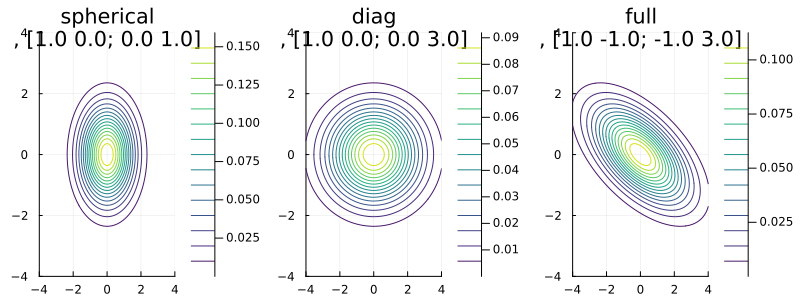

In [33]:
using Plots
using Distributions

# Create a grid of points
x = -4:0.01:4
y = -4:0.01:4
position = Iterators.product(x, y)

# Different values for the covariance matrix
covariances = [ 
      [1.0 0.0;
       0.0 1.0]
    , [1.0 0.0;
       0.0 3.0]
    , [1.0 -1.0; 
      -1.0 3.0] 
]
titles = ["spherical", "diag", "full"]

# Create a 3x1 plot layout
plot_array = []
for i in 1:3
    z = pdf(MvNormal([0.0, 0.0], covariances[i]), [collect(pos) for pos in position])
    push!(plot_array, 
        # heatmap(
        contour(
            x, y
            , reshape(z, length(x), length(y))
            , title="$(titles[i])\n, $(covariances[i])"
            , xlim=(-4, 4), ylim=(-4, 4)
            , color=:viridis
            , fontsize=1
        )
    )
end

plot(plot_array...
    , layout=(1, 3)
    , size=(800, 300)
)
